# About

This analysis is based off of the "Training" set, with sex and outcome based analysis utilizing the provided solutions dataset. 

In [15]:
img_dir = "images/"

# Import and Read Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

qu_df = pd.read_excel("datasets/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
cat_df = pd.read_excel("datasets/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
df_sol = pd.read_excel("datasets/TRAIN/TRAINING_SOLUTIONS.xlsx")
data_dict = pd.read_excel("datasets/Data Dictionary.xlsx")

qu_df = df_sol.join(qu_df, rsuffix="_right")
qu_df = qu_df.drop(columns=["participant_id_right"])

cat_df = df_sol.join(cat_df, rsuffix="_right")
cat_df = cat_df.drop(columns=["participant_id_right"])

In [17]:
data_dict = data_dict.replace("Categorical ", "Categorical", regex=True)


# Functions and Utility

In [18]:
colors = {"general":"mediumpurple", "adhd":"hotpink", "f":"cornflowerblue","m":"coral","noadhd":"royalblue", "m_noadhd":"coral", "m_adhd":"orange", "f_adhd":"skyblue", "f_noadhd":"cornflowerblue"}

In [19]:
def addLabels(title="", xlabel="", ylabel="", subplot_ax=None):
  if subplot_ax == None:
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
  else:
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel(xlabel)
    subplot_ax.set_ylabel(ylabel)


In [20]:
def printDfDesc(df):
  print(f'Shape: {df.shape}')
  print(f'\nDTypes: \n{df.dtypes}')
  print(f'\Is NaN: \n{df[df.isna()].value_counts()}')
  print(f'\Is Null: \n{df[df.isnull()].value_counts()}')
  print(f'\nKeys: \n{df.keys()}')

# Quantitative Data

In [21]:
qu_dict= data_dict[data_dict["DataType"]=="Quantitative"][["Field","Instrument"]]

## Description

In [22]:
printDfDesc(qu_df)

Shape: (1213, 21)

DTypes: 
participant_id                 object
ADHD_Outcome                    int64
Sex_F                           int64
EHQ_EHQ_Total                 float64
ColorVision_CV_Score            int64
APQ_P_APQ_P_CP                  int64
APQ_P_APQ_P_ID                  int64
APQ_P_APQ_P_INV                 int64
APQ_P_APQ_P_OPD                 int64
APQ_P_APQ_P_PM                  int64
APQ_P_APQ_P_PP                  int64
SDQ_SDQ_Conduct_Problems        int64
SDQ_SDQ_Difficulties_Total      int64
SDQ_SDQ_Emotional_Problems      int64
SDQ_SDQ_Externalizing           int64
SDQ_SDQ_Generating_Impact       int64
SDQ_SDQ_Hyperactivity           int64
SDQ_SDQ_Internalizing           int64
SDQ_SDQ_Peer_Problems           int64
SDQ_SDQ_Prosocial               int64
MRI_Track_Age_at_Scan         float64
dtype: object
\Is NaN: 
Series([], Name: count, dtype: int64)
\Is Null: 
Series([], Name: count, dtype: int64)

Keys: 
Index(['participant_id', 'ADHD_Outcome', 'Sex_F', 'EHQ_

In [23]:
print(qu_df.isna().value_counts())

participant_id  ADHD_Outcome  Sex_F  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan
False           False         False  False          False                 False           False           False            False            False           False           False                     False                       False                       False                  False                      False                  False                  False                  False              False                    853
                                                                                                                                                                     

In [24]:
sdq_df = qu_df[["SDQ_SDQ_Conduct_Problems", "SDQ_SDQ_Difficulties_Total","SDQ_SDQ_Emotional_Problems","SDQ_SDQ_Externalizing","SDQ_SDQ_Generating_Impact","SDQ_SDQ_Hyperactivity","SDQ_SDQ_Internalizing","SDQ_SDQ_Peer_Problems","SDQ_SDQ_Prosocial"]]



sdq_mean = []
sdq_sum = []

for index, row in sdq_df.iterrows():
  sdq_sum += [(row.sum())]
  sdq_mean += [(row.mean())]

qu_df["SDQ_Sum"] = sdq_sum
qu_df["SDQ_Mean"] = sdq_mean


In [25]:
apq_cols = ["APQ_P_APQ_P_CP", "APQ_P_APQ_P_ID", "APQ_P_APQ_P_INV", "APQ_P_APQ_P_OPD", "APQ_P_APQ_P_PM", "APQ_P_APQ_P_PP", "Sex_F", "ADHD_Outcome"]
apq_df = qu_df[apq_cols]
apq_mean = []
apq_sum = []

for index, row in apq_df.iterrows():
  apq_sum += [(row.sum())]
  apq_mean += [(row.mean())]

qu_df["APQ_Sum"] = apq_sum
qu_df["APQ_Mean"] = apq_mean


## Correlations

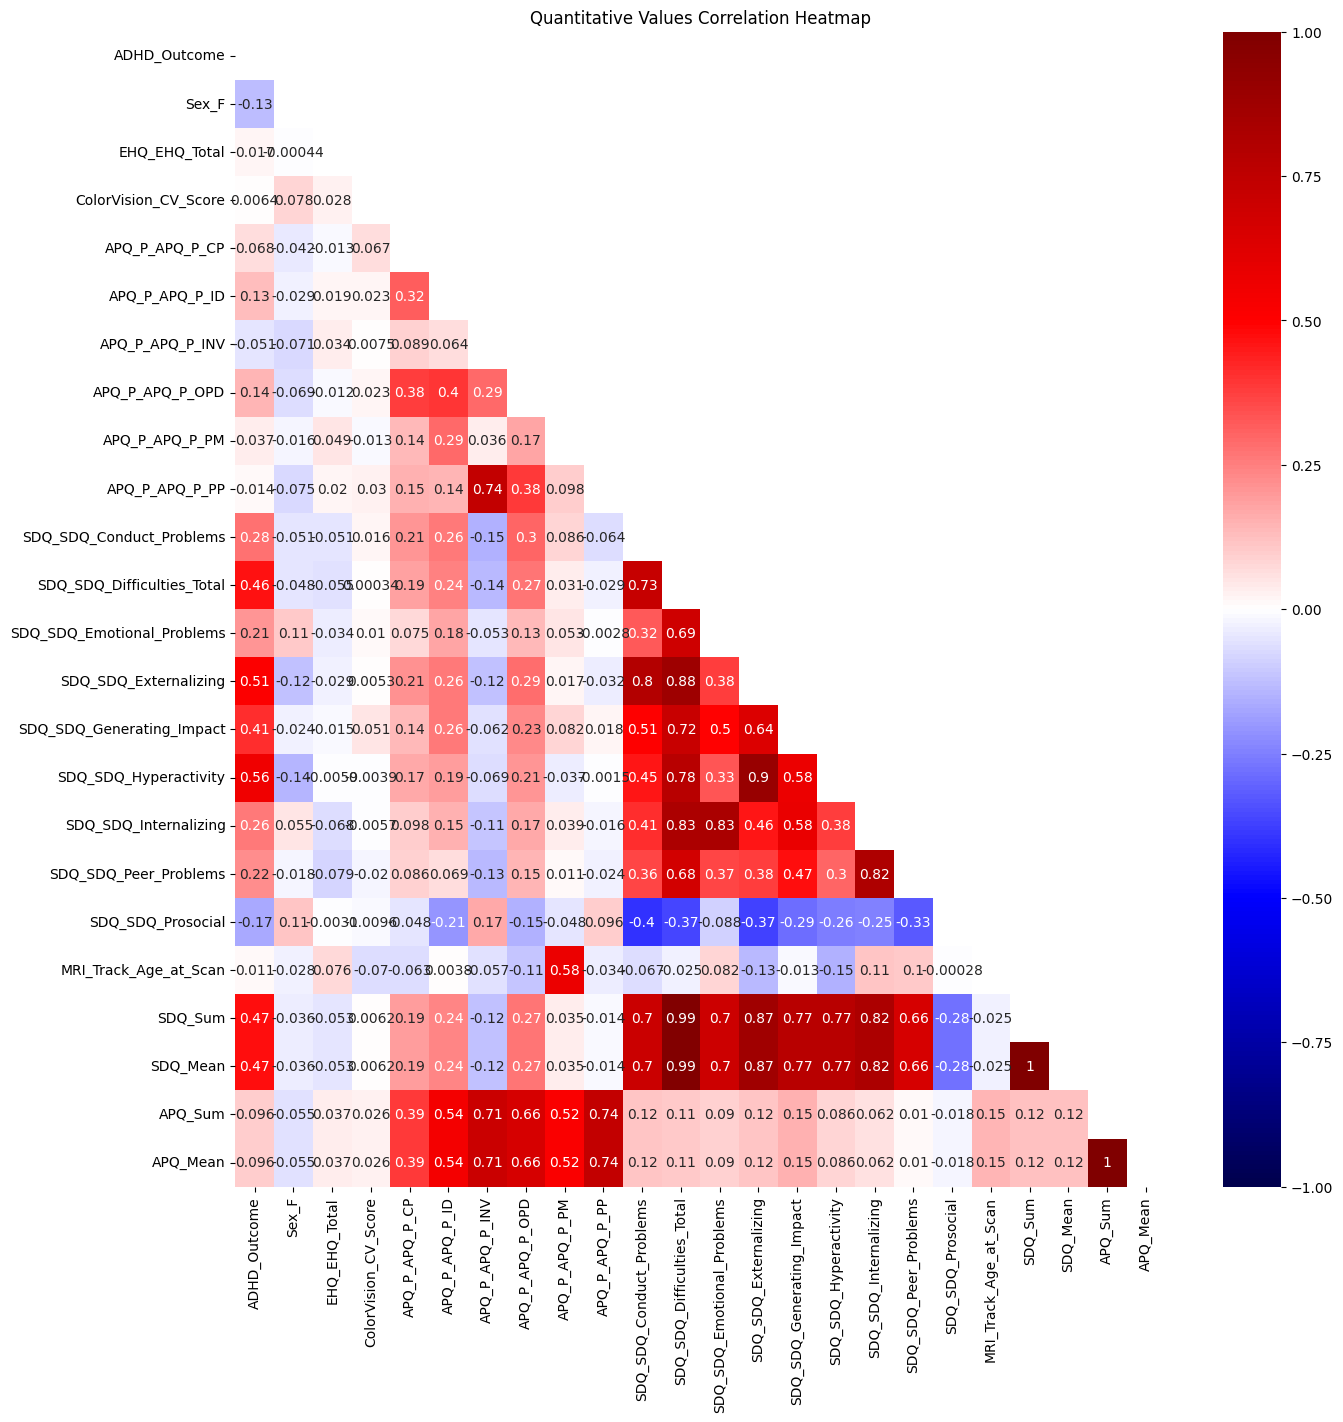

In [26]:
import seaborn as sns

plt.figure(figsize=(15,15))

qu_corr = qu_df.corr(numeric_only=True)

emptyMask = np.ones_like(qu_corr, dtype=bool)
trimask = np.zeros_like(qu_corr)
trimask[np.triu_indices_from(trimask)] = True

emptyMask[qu_corr>=0.8] = False
emptyMask[qu_corr<=-0.8] = False

dataplot = sns.heatmap(qu_corr, cmap="seismic", annot=True, mask=trimask, vmin=-1.0, vmax=1.0)
plt.title("Quantitative Values Correlation Heatmap")
# plt.savefig(img_dir + "quantitative-corr.png")
plt.show()


#### 4-Group Correlations

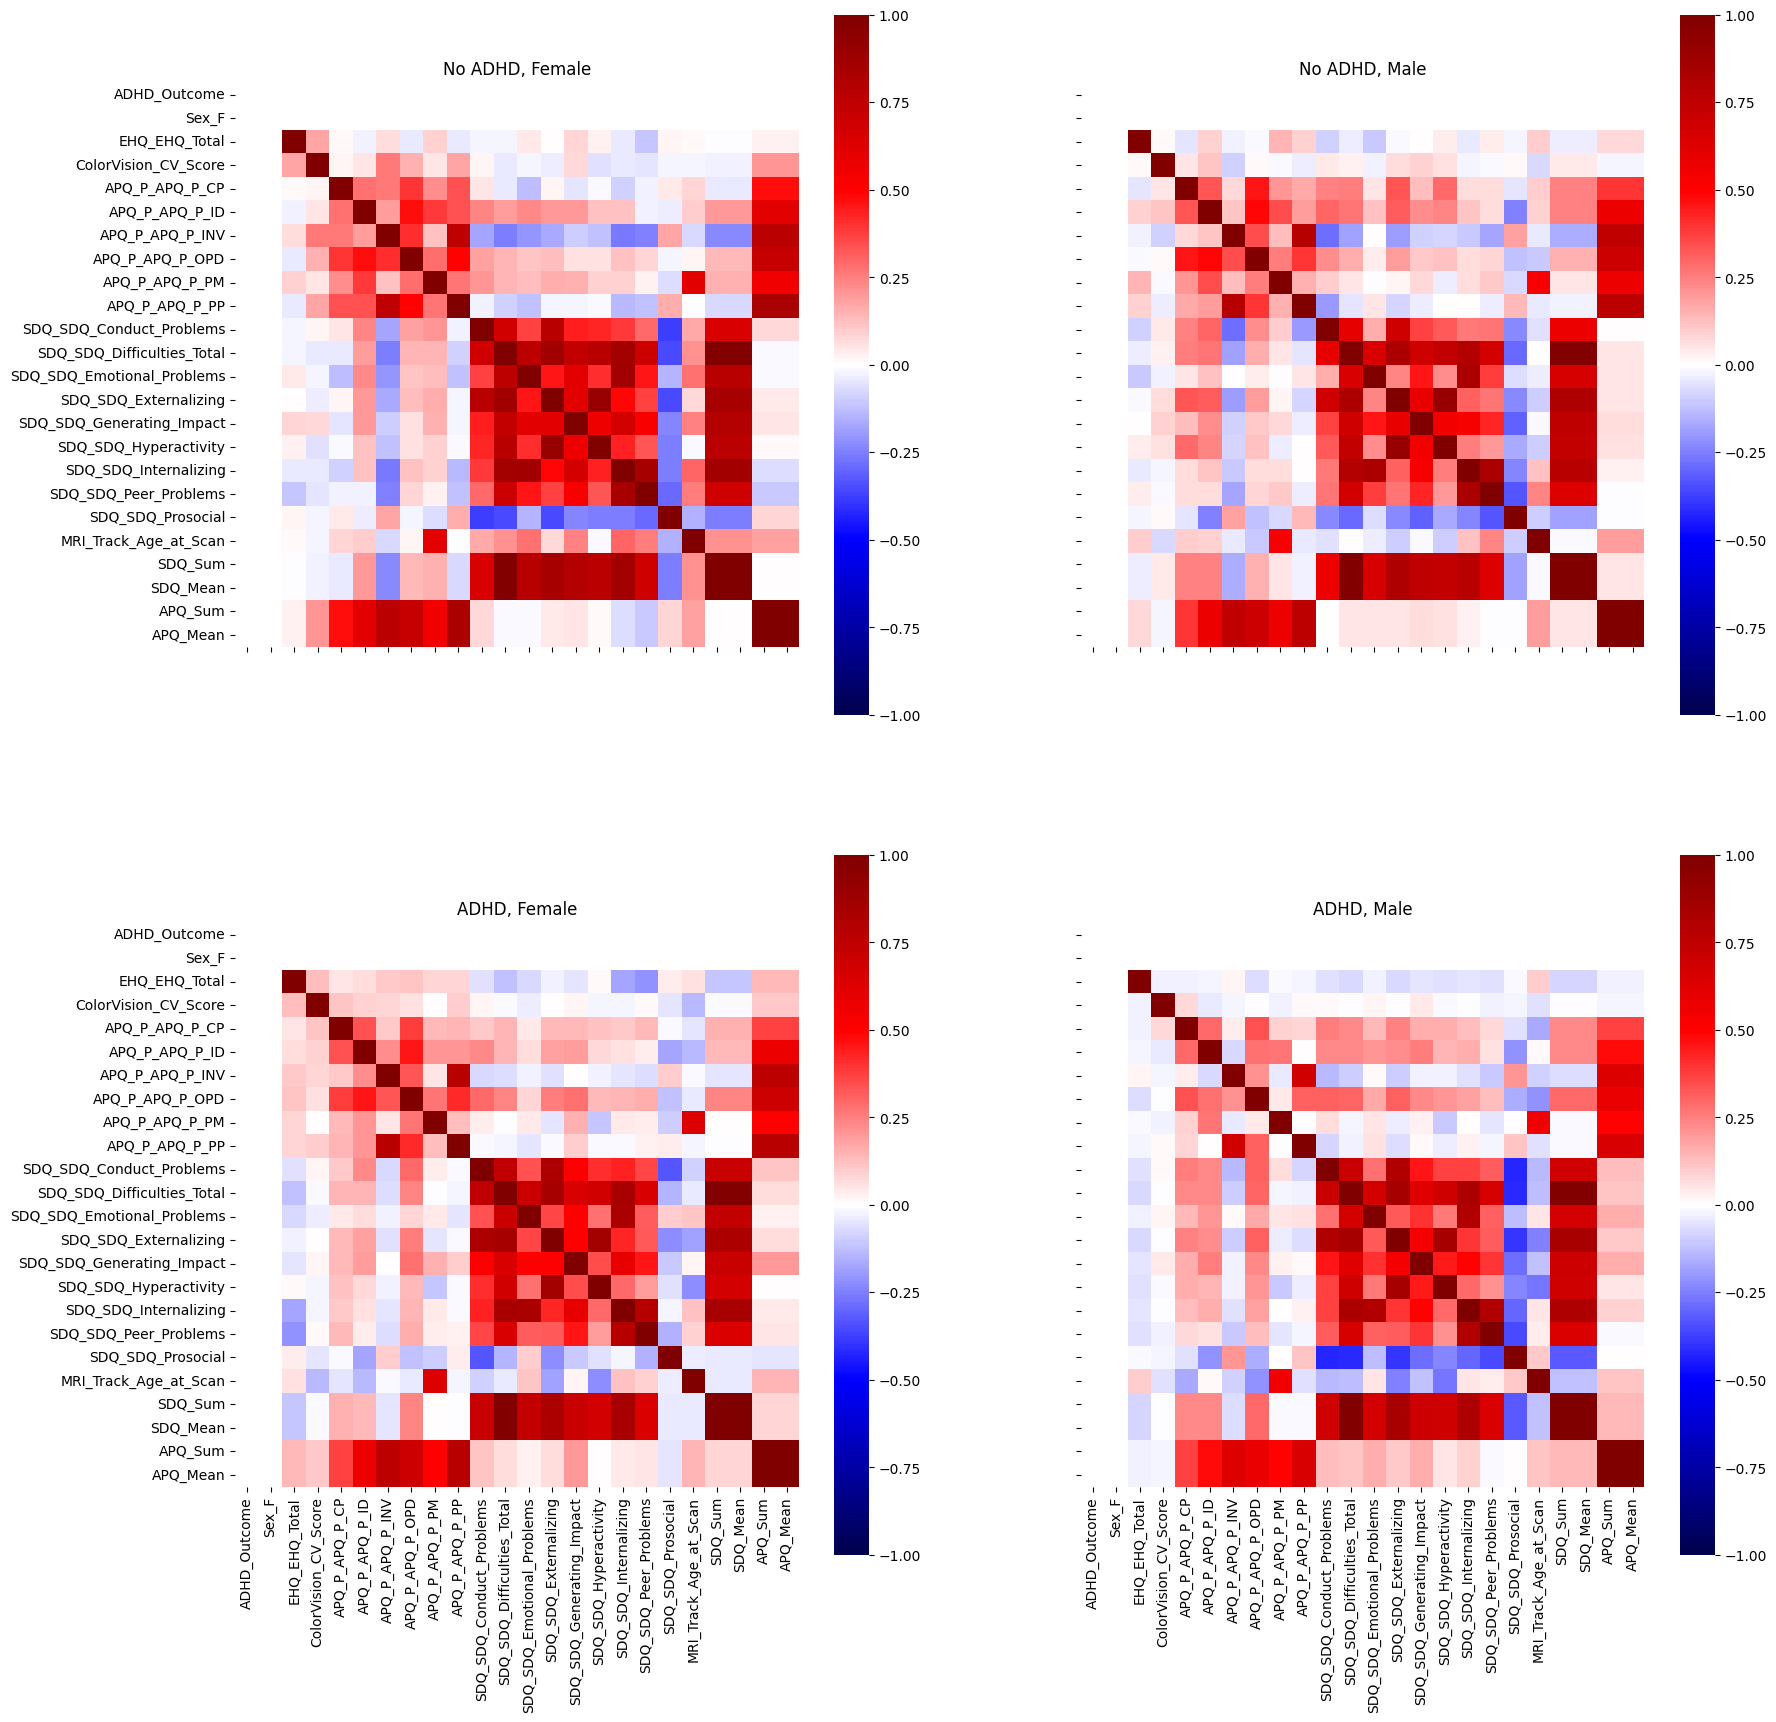

In [27]:
# plt.figure(figsize=(15,15))
fig, ax = plt.subplots(2,2, figsize=(20,20), sharex=True, sharey=True)

trimask = np.zeros_like(qu_corr)
trimask[np.triu_indices_from(trimask)] = True


dataplot = sns.heatmap(qu_df.query("Sex_F == 1 and ADHD_Outcome == 0").corr(numeric_only=True), cmap="seismic", annot=False, vmin=-1.0, vmax=1.0, square=True, ax=ax[0,0])
dataplot = sns.heatmap(qu_df.query("Sex_F == 0 and ADHD_Outcome == 0").corr(numeric_only=True), cmap="seismic", annot=False, vmin=-1.0, vmax=1.0, square=True, ax=ax[0,1])
dataplot = sns.heatmap(qu_df.query("Sex_F == 1 and ADHD_Outcome == 1").corr(numeric_only=True), cmap="seismic", annot=False, vmin=-1.0, vmax=1.0, square=True, ax=ax[1,0])
dataplot = sns.heatmap(qu_df.query("Sex_F == 0 and ADHD_Outcome == 1").corr(numeric_only=True), cmap="seismic", annot=False, vmin=-1.0, vmax=1.0, square=True, ax=ax[1,1])

ax[0,0].set_title("No ADHD, Female")
ax[0,1].set_title("No ADHD, Male")
ax[1,0].set_title("ADHD, Female")
ax[1,1].set_title("ADHD, Male")

# plt.savefig(img_dir + "4-part-quantitative-corr.png")
plt.show()

#### Questionnaire-Separated Correlations

Index(['ADHD_Outcome', 'Sex_F', 'Conduct_Problems', 'Difficulties_Total',
       'Emotional_Problems', 'Externalizing', 'Generating_Impact',
       'Hyperactivity', 'Internalizing', 'Peer_Problems', 'Prosocial', 'Sum',
       'Mean'],
      dtype='object')


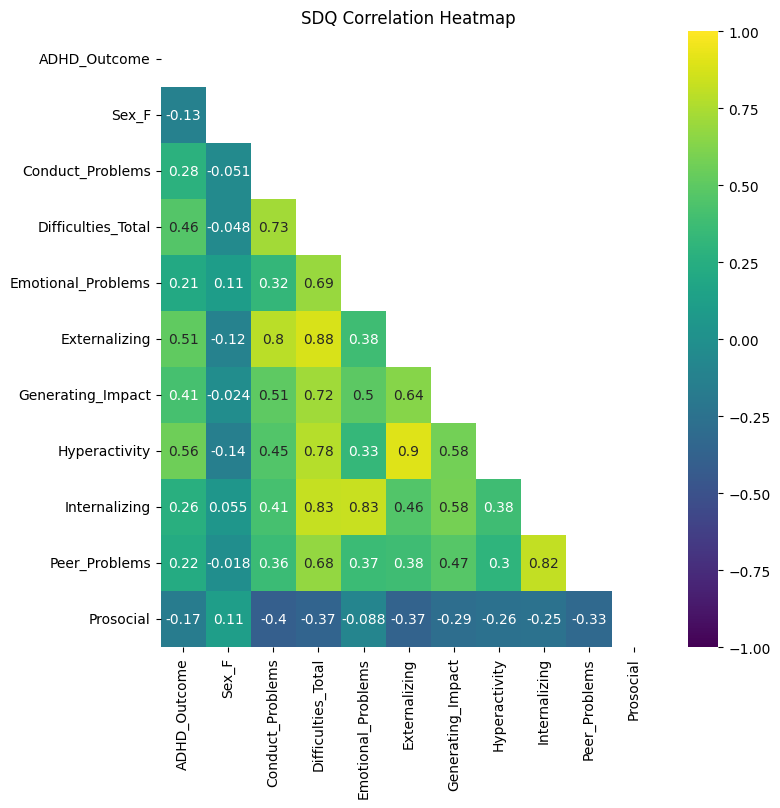

In [34]:
plt.figure(figsize=(8,8))

qu_df_rn = qu_df[["ADHD_Outcome",
                 "Sex_F"
                 ,"SDQ_SDQ_Conduct_Problems"
                 ,"SDQ_SDQ_Difficulties_Total"
                 ,"SDQ_SDQ_Emotional_Problems"
                 ,"SDQ_SDQ_Externalizing"
                 ,"SDQ_SDQ_Generating_Impact"
                 ,"SDQ_SDQ_Hyperactivity"
                 ,"SDQ_SDQ_Internalizing"
                 ,"SDQ_SDQ_Peer_Problems"
                 ,"SDQ_SDQ_Prosocial"
                 ,"SDQ_Sum"
                 ,"SDQ_Mean"
]].copy(deep=True)

qu_df_rn = qu_df_rn.rename(columns={"ADHD_Outcome":"ADHD_Outcome",
                 "Sex_F":"Sex_F"
                 ,"SDQ_SDQ_Conduct_Problems":"Conduct_Problems"
                 ,"SDQ_SDQ_Difficulties_Total":"Difficulties_Total"
                 ,"SDQ_SDQ_Emotional_Problems":"Emotional_Problems"
                 ,"SDQ_SDQ_Externalizing":"Externalizing"
                 ,"SDQ_SDQ_Generating_Impact":"Generating_Impact"
                 ,"SDQ_SDQ_Hyperactivity":"Hyperactivity"
                 ,"SDQ_SDQ_Internalizing":"Internalizing"
                 ,"SDQ_SDQ_Peer_Problems":"Peer_Problems"
                 ,"SDQ_SDQ_Prosocial":"Prosocial", "SDQ_Mean":"Mean", "SDQ_Sum":"Sum"})

print(qu_df_rn.keys())

qu_corr = qu_df_rn[["ADHD_Outcome",
                 "Sex_F"
                  ,"Conduct_Problems"
                  ,"Difficulties_Total"
                  ,"Emotional_Problems"
                  ,"Externalizing"
                  ,"Generating_Impact"
                  ,"Hyperactivity"
                  ,"Internalizing"
                  ,"Peer_Problems"
                  ,"Prosocial"
                #  ,"SDQ_Sum"
                #  ,"SDQ_Mean"
]].corr(numeric_only=True)


# qu_corr = qu_df[["ADHD_Outcome",
#                  "Sex_F"
#                  ,"SDQ_SDQ_Conduct_Problems"
#                  ,"SDQ_SDQ_Difficulties_Total"
#                  ,"SDQ_SDQ_Emotional_Problems"
#                  ,"SDQ_SDQ_Externalizing"
#                  ,"SDQ_SDQ_Generating_Impact"
#                  ,"SDQ_SDQ_Hyperactivity"
#                  ,"SDQ_SDQ_Internalizing"
#                  ,"SDQ_SDQ_Peer_Problems"
#                  ,"SDQ_SDQ_Prosocial"
#                 #  ,"SDQ_Sum"
#                 #  ,"SDQ_Mean"
# ]].corr(numeric_only=True)



emptyMask = np.ones_like(qu_corr, dtype=bool)
trimask = np.zeros_like(qu_corr)
trimask[np.triu_indices_from(trimask)] = True

emptyMask[qu_corr>=0.8] = False
emptyMask[qu_corr<=-0.8] = False

dataplot = sns.heatmap(qu_corr, cmap=sns.color_palette("viridis", as_cmap=True), annot=True, mask=trimask, vmin=-1.0, vmax=1.0)
plt.title("SDQ Correlation Heatmap")
# plt.savefig(img_dir + "quantitative-sdq-corr.png")
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
qu_corr = qu_df[[
  "ADHD_Outcome",
  "Sex_F",
"APQ_P_APQ_P_CP",
"APQ_P_APQ_P_ID",
"APQ_P_APQ_P_INV",
"APQ_P_APQ_P_OPD",
"APQ_P_APQ_P_PM",
"APQ_P_APQ_P_PP",
"APQ_Sum","APQ_Mean"]].corr(numeric_only=True)

emptyMask = np.ones_like(qu_corr, dtype=bool)
trimask = np.zeros_like(qu_corr)
trimask[np.triu_indices_from(trimask)] = True

emptyMask[qu_corr>=0.8] = False
emptyMask[qu_corr<=-0.8] = False

dataplot = sns.heatmap(qu_corr, cmap="seismic", annot=True, mask=trimask, vmin=-1.0, vmax=1.0)
plt.title("APQ Correlation Heatmap")
# plt.savefig(img_dir + "quantitative-apq-corr.png")
plt.show()

In [ ]:
plt.scatter(qu_df["SDQ_SDQ_Externalizing"], qu_df["SDQ_SDQ_Hyperactivity"])
plt.scatter(qu_df.query("ADHD_Outcome == 0")["SDQ_SDQ_Externalizing"], qu_df.query("ADHD_Outcome == 0")["SDQ_SDQ_Hyperactivity"])
plt.scatter(qu_df.query("ADHD_Outcome == 1")["SDQ_SDQ_Externalizing"], qu_df.query("ADHD_Outcome == 1")["SDQ_SDQ_Hyperactivity"])

## Histograms

In [ ]:
plt.hist(qu_df["MRI_Track_Age_at_Scan"],22, color=colors["general"])
addLabels("Age at Scan", "Age", "Number of Subjects",)
plt.show()

plt.hist(qu_df[qu_df["ADHD_Outcome"]==0]["MRI_Track_Age_at_Scan"],22, label="No ADHD", color=colors["noadhd"])
plt.hist(qu_df[qu_df["ADHD_Outcome"]==1]["MRI_Track_Age_at_Scan"],22, label="ADHD", color=colors["adhd"], alpha=0.5)
addLabels("Age at Scan, Grouped by ADHD Outcome", "Age", "Number of Subjects")
plt.show()

plt.hist(qu_df[qu_df["Sex_F"]==0]["MRI_Track_Age_at_Scan"],22, label="Male", color=colors["m"])
plt.hist(qu_df[qu_df["Sex_F"]==1]["MRI_Track_Age_at_Scan"],22, label="Female", color=colors["f"], alpha=0.5)
addLabels("Age at Scan, Grouped by Sex", "Age", "Number of Subjects")
plt.show()

In [ ]:
plt.hist(qu_df["EHQ_EHQ_Total"],100, color=colors["general"])
addLabels("Handedness Laterality Index", "Handedness Laterality Index", "Number of Subjects",)
plt.show()

plt.hist(qu_df[qu_df["ADHD_Outcome"]==0]["EHQ_EHQ_Total"],20, alpha=0.2, label="No ADHD", color=colors["noadhd"])
plt.hist(qu_df[qu_df["ADHD_Outcome"]==1]["EHQ_EHQ_Total"],20, alpha=0.1, label="ADHD", color=colors["adhd"])

plt.hist(qu_df[qu_df["ADHD_Outcome"]==0]["EHQ_EHQ_Total"],100, alpha=1.0, label="No ADHD", color=colors["noadhd"])
plt.hist(qu_df[qu_df["ADHD_Outcome"]==1]["EHQ_EHQ_Total"],100, alpha=0.75, label="ADHD", color=colors["adhd"])
addLabels("Handedness Laterality Index, Grouped by ADHD Outcome", "Handedness Laterality Index", "Number of Subjects")
plt.legend(title="ADHD Outcome")
plt.show()

# plt.hist(qu_df[qu_df["Sex_F"]==0]["EHQ_EHQ_Total"],11, alpha=0.1, label="Male", color=colors["m"], density=True)
# plt.hist(qu_df[qu_df["Sex_F"]==1]["EHQ_EHQ_Total"],11, alpha=0.2, label="Female", color=colors["f"], density=True)
plt.hist(qu_df[qu_df["Sex_F"]==0]["EHQ_EHQ_Total"],200, alpha=1.0, label="Male", color=colors["m"], density=True)
plt.hist(qu_df[qu_df["Sex_F"]==1]["EHQ_EHQ_Total"],200, alpha=0.75, label="Female", color=colors["f"], density=True)
addLabels("Handedness Laterality Index, Grouped by Sex", "Handedness Laterality Index", "Number of Subjects")
plt.legend(title="Sex")
plt.show()

In [ ]:
cv_df = qu_df[["ADHD_Outcome", "Sex_F","ColorVision_CV_Score"]]

fig, ax = plt.subplots(1,4,sharey=True,figsize=(10,10))

cat = sns.boxplot(cv_df.query("ADHD_Outcome == 0 and Sex_F == 1 and ColorVision_CV_Score")["ColorVision_CV_Score"], ax=ax[0], log_scale=True)
cat = sns.boxplot(cv_df.query("ADHD_Outcome == 0 and Sex_F == 0 and ColorVision_CV_Score")["ColorVision_CV_Score"], ax=ax[1], log_scale=True)
cat = sns.boxplot(cv_df.query("ADHD_Outcome == 1 and Sex_F == 1 and ColorVision_CV_Score")["ColorVision_CV_Score"], ax=ax[2], log_scale=True)
cat = sns.boxplot(cv_df.query("ADHD_Outcome == 1 and Sex_F == 0 and ColorVision_CV_Score")["ColorVision_CV_Score"], ax=ax[3], log_scale=True)

addLabels(ylabel="Number of Subjects")

ax[0].set_title("Female, No ADHD")
ax[1].set_title("Male, No ADHD")
ax[2].set_title("Female, ADHD")
ax[3].set_title("Male, ADHD")

plt.show()


plt.hist(cv_df.query("ADHD_Outcome == 0 and Sex_F == 1")["ColorVision_CV_Score"], 14, color=colors["f_noadhd"], rwidth=1, align="right", label="No ADHD, Female")
plt.hist(cv_df.query("ADHD_Outcome == 0 and Sex_F == 0")["ColorVision_CV_Score"], 14, color=colors["m_noadhd"], rwidth=0.5, align="right", label="No ADHD, Male")
plt.hist(cv_df.query("ADHD_Outcome == 1 and Sex_F == 1")["ColorVision_CV_Score"], 14, color=colors["f_adhd"], rwidth=1, align="left", label="ADHD, Female")
plt.hist(cv_df.query("ADHD_Outcome == 1 and Sex_F == 0")["ColorVision_CV_Score"], 14, color=colors["m_adhd"], rwidth=0.5, align="left", label="ADHD, Male")

plt.show()

### Strengths and Difficulties Questionnaire (SDQ)

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(16,12))

sdq_cols = ["SDQ_SDQ_Conduct_Problems", "SDQ_SDQ_Difficulties_Total","SDQ_SDQ_Emotional_Problems","SDQ_SDQ_Externalizing","SDQ_SDQ_Generating_Impact","SDQ_SDQ_Hyperactivity","SDQ_SDQ_Internalizing","SDQ_SDQ_Peer_Problems","SDQ_SDQ_Prosocial"]

for i in range(3):
  for j in range(3):
    ax[i,j].hist(qu_df[sdq_cols[i*3 + j]], rwidth=0.95, color=colors["general"])
    addLabels(sdq_cols[i*3+j].replace("SDQ_SDQ_","SDQ "), subplot_ax=ax[i,j])
    ax[i,j].legend(title="All Subjects")
# plt.savefig(img_dir + "sdq-hist-general.png")
plt.show()

fig, ax = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
  for j in range(3):
    ax[i,j].hist(qu_df[qu_df["ADHD_Outcome"]==0][sdq_cols[i*3 + j]], bins=10,alpha=0.5, density=True, rwidth=0.9, label="No ADHD", color=colors["noadhd"])
    ax[i,j].hist(qu_df[qu_df["ADHD_Outcome"]==1][sdq_cols[i*3 + j]], bins=10,alpha=0.5, density=True, rwidth=0.9, label="ADHD", color=colors["adhd"])
    addLabels(sdq_cols[i*3+j].replace("SDQ_SDQ_","SDQ "), subplot_ax=ax[i,j])
    ax[i,j].legend(title="Outcome")
# plt.savefig(img_dir + "sdq-hist-outcome.png")
plt.show()

fig, ax = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
  for j in range(3):
    ax[i,j].hist(qu_df[qu_df["Sex_F"]==0][sdq_cols[i*3 + j]], bins=10,alpha=0.5,density=True, rwidth=0.9, label="Male", color=colors["m"])
    ax[i,j].hist(qu_df[qu_df["Sex_F"]==1][sdq_cols[i*3 + j]], bins=10,alpha=0.5,density=True, rwidth=0.9, label="Female", color=colors["f"])
    addLabels(sdq_cols[i*3+j].replace("SDQ_SDQ_","SDQ "), subplot_ax=ax[i,j])
    ax[i,j].legend(title="Sex")
# plt.savefig(img_dir + "sdq-hist-sex.png")
plt.show()

fig, ax = plt.subplots(3,3, figsize=(16,12))
for i in range(3):
  for j in range(3):
    ax[i,j].bar(qu_df.query("Sex_F == 0 and ADHD_Outcome == 0")[sdq_cols[i*3 + j]].sort_values().unique(),qu_df.query("Sex_F == 0 and ADHD_Outcome == 0")[sdq_cols[i*3 + j]].sort_values().value_counts(), label="Male, No ADHD", width=-0.5, align="edge", color=colors["m_noadhd"])
    ax[i,j].bar(qu_df.query("Sex_F == 0 and ADHD_Outcome == 1")[sdq_cols[i*3 + j]].sort_values().unique(),qu_df.query("Sex_F == 0 and ADHD_Outcome == 1")[sdq_cols[i*3 + j]].sort_values().value_counts(), label="Male, ADHD", width=-0.25, align="edge", color=colors["m_adhd"])
    ax[i,j].bar(qu_df.query("Sex_F == 1 and ADHD_Outcome == 0")[sdq_cols[i*3 + j]].sort_values().unique(),qu_df.query("Sex_F == 1 and ADHD_Outcome == 0")[sdq_cols[i*3 + j]].sort_values().value_counts(), label="Female, No ADHD", width=0.5, align="edge", color=colors["f_noadhd"])
    ax[i,j].bar(qu_df.query("Sex_F == 1 and ADHD_Outcome == 1")[sdq_cols[i*3 + j]].sort_values().unique(),qu_df.query("Sex_F == 1 and ADHD_Outcome == 1")[sdq_cols[i*3 + j]].sort_values().value_counts(), label="Female, ADHD", width=0.25, align="edge", color=colors["f_adhd"])
    addLabels(sdq_cols[i*3+j].replace("SDQ_SDQ_","SDQ "), subplot_ax=ax[i,j])
    ax[i,j].legend(title="Sex")
# plt.savefig(img_dir + "sdq-hist-sex-and-outcome.png")
plt.show()


In [ ]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(data=sdq_df)
plt.xticks(rotation=90)
plt.show()


fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.boxplot(data=qu_df.query("Sex_F == 1 and ADHD_Outcome == 0")[sdq_cols], ax=ax[0])
sns.boxplot(data=qu_df.query("Sex_F == 0 and ADHD_Outcome == 0")[sdq_cols], ax=ax[1])
sns.boxplot(data=qu_df.query("Sex_F == 1 and ADHD_Outcome == 1")[sdq_cols], ax=ax[2])
sns.boxplot(data=qu_df.query("Sex_F == 0 and ADHD_Outcome == 1")[sdq_cols], ax=ax[3])
ax[0].set_title("Female, No ADHD")
ax[1].set_title("Male, No ADHD")
ax[2].set_title("Female, ADHD")
ax[3].set_title("Male, ADHD")

ax[0].set_xticks(ticks=range(len(sdq_df.keys())), labels=sdq_df.keys(), rotation=90)
ax[1].set_xticks(ticks=range(len(sdq_df.keys())), labels=sdq_df.keys(), rotation=90)
ax[2].set_xticks(ticks=range(len(sdq_df.keys())), labels=sdq_df.keys(), rotation=90)
ax[3].set_xticks(ticks=range(len(sdq_df.keys())), labels=sdq_df.keys(), rotation=90)
plt.show()

### Alabama Parenting Questionnaire (APQ)

In [ ]:
apq_names = {"APQ_P_APQ_P_CP":"Coporal Punishment Score",
"APQ_P_APQ_P_ID":"Inconsistent Discipline Score",
"APQ_P_APQ_P_INV":"Involvement Score",
"APQ_P_APQ_P_OPD":"Other Discipline Practices Score",
"APQ_P_APQ_P_PM":"Poor Monitoring/Supervision Score",
"APQ_P_APQ_P_PP":"Positive Parenting Score"}

fig, ax = plt.subplots(2,3, figsize=(12,8))

for i in range(2):
  for j in range(3):
    ax[i,j].hist(apq_df[apq_df.keys()[i*2+j]], rwidth=0.9, color=colors["general"])
    addLabels(title="APQ " + apq_names[apq_df.keys()[i*2+j]], subplot_ax=ax[i,j])
    ax[i,j].legend(title="All Subjects")
# plt.savefig(img_dir + "sdq-hist-general.png")
plt.show()



fig, ax = plt.subplots(2,3, figsize=(12,8))

for i in range(2):
  for j in range(3):
    ax[i,j].hist(apq_df.query("ADHD_Outcome == 0")[apq_df.keys()[i*2+j]], rwidth=0.9, alpha=1.0, density=True, color=colors["noadhd"], label="No ADHD")
    ax[i,j].hist(apq_df.query("ADHD_Outcome == 1")[apq_df.keys()[i*2+j]], rwidth=0.9, alpha=0.5, density=True, color=colors["adhd"], label="ADHD")
    addLabels(title="APQ " + apq_names[apq_df.keys()[i*2+j]], subplot_ax=ax[i,j])
    ax[i,j].legend(title="Outcome")
# plt.savefig(img_dir + "sdq-hist-outcome.png")
plt.show()

fig, ax = plt.subplots(2,3, figsize=(12,8))
for i in range(2):
  for j in range(3):
    ax[i,j].hist(apq_df.query("Sex_F == 0")[apq_df.keys()[i*2+j]], rwidth=0.9, alpha=1.0, density=True, color=colors["m"], label="Male")
    ax[i,j].hist(apq_df.query("Sex_F == 1")[apq_df.keys()[i*2+j]], rwidth=0.9, alpha=0.5, density=True, color=colors["f"], label="Female")
    addLabels(title="APQ " + apq_names[apq_df.keys()[i*2+j]], subplot_ax=ax[i,j])
    ax[i,j].legend(title="Sex")
# plt.savefig(img_dir + "sdq-hist-sex.png")
plt.show()

apq_keys = [key for key, val in apq_names.items()]

fig, ax = plt.subplots(2,3, figsize=(12,8))
for i in range(2):
  for j in range(3):
    ax[i,j].bar(qu_df.query("Sex_F == 0 and ADHD_Outcome == 0")[apq_keys[i*2 + j]].sort_values().unique(),qu_df.query("Sex_F == 0 and ADHD_Outcome == 0")[apq_keys[i*2 + j]].sort_values().value_counts(), label="Male, No ADHD", width=-0.5, align="edge", color=colors["m_noadhd"])
    ax[i,j].bar(qu_df.query("Sex_F == 0 and ADHD_Outcome == 1")[apq_keys[i*2 + j]].sort_values().unique(),qu_df.query("Sex_F == 0 and ADHD_Outcome == 1")[apq_keys[i*2 + j]].sort_values().value_counts(), label="Male, ADHD", width=-0.25, align="edge", color=colors["m_adhd"])
    ax[i,j].bar(qu_df.query("Sex_F == 1 and ADHD_Outcome == 0")[apq_keys[i*2 + j]].sort_values().unique(),qu_df.query("Sex_F == 1 and ADHD_Outcome == 0")[apq_keys[i*2 + j]].sort_values().value_counts(), label="Female, No ADHD", width=0.5, align="edge", color=colors["f_noadhd"])
    ax[i,j].bar(qu_df.query("Sex_F == 1 and ADHD_Outcome == 1")[apq_keys[i*2 + j]].sort_values().unique(),qu_df.query("Sex_F == 1 and ADHD_Outcome == 1")[apq_keys[i*2 + j]].sort_values().value_counts(), label="Female, ADHD", width=0.25, align="edge", color=colors["f_adhd"])
    addLabels(title="APQ " + apq_names[apq_df.keys()[i*2+j]], subplot_ax=ax[i,j])
    ax[i,j].legend(title="Sex")
# plt.savefig(img_dir + "sdq-hist-sex-and-outcome.png")
plt.show()

# Categorical

Note: The original DataType "Categorical " had a space at the end, which caused me *way* more issues than it should have. This is specifically renamed in the [Import and Read Data](#import-and-read-data) section.

In [ ]:
cat_dict = data_dict[data_dict["DataType"]=="Categorical"][["Field","Instrument", "Labels"]]


In [ ]:
import re

def catLabelsAsList(labelsText):
  """
  Get the list of labels per integer, in order of listing, for the provided data dictionary labels entry.
  Args:
    labelsText (str) : Labels to be parsed
    format (str) : The format to return lists in. "labels" returns list of labels only, "indicies" only returns a list of index values, and "both" returns a both as a tuple (indicies, labels)
  Returns:
    return (list) : List of labels found in the labels text. Returns an empty list if no matches could be found.
  """


  def iterMatch(i):
    catLabelPat = "(([0-9]+)(?:=\s*)([\W\S]+?)(?:\n|$))"
    matchLabels = []
    matchInd = []


    if True:
        m_iter = re.finditer(catLabelPat, i)
        for m in m_iter:
          matchLabels+=[m.groups()[2]]
          matchInd+=[int(m.groups()[1])]
    return matchInd, matchLabels

  foundLabels = []
  foundInd = []

  if hasattr(labelsText, '__iter__'):
    if isinstance(labelsText, str):
      foundLabels = iterMatch(labelsText)
    else:
      if len(labelsText) == 1:
        for t in labelsText:
          foundInd, foundLabels = iterMatch(t)
      else:
        for t in labelsText:
          mInd, mLab = iterMatch(t)
          foundInd += [mInd]
          foundLabels += [mLab]

  #    labelsText = labelsText.values[0]


  # if hasattr(labelsText, '__iter__'):
  #    labelsText = labelsText.values[0]

  # if labelsText.notna() or labelsText == labelsText:      # Check labelsText not NaN or None

  return foundInd, foundLabels


occ_c1 = cat_dict[cat_dict["Field"]=="Barratt_Barratt_P1_Occ"]["Labels"]
catLabelsAsList(occ_c1)


## Correlations

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,15))

cat_corr = cat_df.corr(method="spearman",numeric_only=True)

emptyMask = np.ones_like(cat_corr, dtype=bool)
trimask = np.zeros_like(cat_corr)
trimask[np.triu_indices_from(trimask)] = True

emptyMask[cat_corr>=0.8] = False
emptyMask[cat_corr<=-0.8] = False

dataplot = sns.heatmap(cat_df.corr(numeric_only=True), cmap="YlGnBu", annot=True, mask=trimask)
# plt.savefig(img_dir + "categorical-corr.png")
plt.show()


## Histograms

#### Parent Occupations

In [ ]:
occ_c1 = cat_dict[cat_dict["Field"]=="Barratt_Barratt_P1_Occ"]["Labels"].sort_index()
occ_c2 = cat_dict[cat_dict["Field"]=="Barratt_Barratt_P2_Occ"]["Labels"].sort_index()

occ1 = cat_df["Barratt_Barratt_P1_Occ"].value_counts().sort_index()
occ2 = cat_df["Barratt_Barratt_P2_Occ"].value_counts().sort_index()

occ1_adhd = cat_df[cat_df["ADHD_Outcome"]==1]["Barratt_Barratt_P1_Occ"].value_counts().sort_index()
occ2_adhd = cat_df[cat_df["ADHD_Outcome"]==1]["Barratt_Barratt_P2_Occ"].value_counts().sort_index()
occ1_noadhd = cat_df[cat_df["ADHD_Outcome"]==0]["Barratt_Barratt_P1_Occ"].value_counts().sort_index()
occ2_noadhd = cat_df[cat_df["ADHD_Outcome"]==0]["Barratt_Barratt_P2_Occ"].value_counts().sort_index()

occ_total_adhd = occ1_adhd + occ2_adhd
occ_total_noadhd = occ1_noadhd + occ2_noadhd

occ_total = occ1 + occ2



lind, lab = catLabelsAsList(occ_c1)

fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)

ax[0,0].bar(lind, occ_total, width=4, color=colors["general"],tick_label=lind)
addLabels("Sum of Parent Occupations", "Occupation", "Number of Parents", subplot_ax=ax[0,0])

ax[0,1].bar(lind, occ1, width=4, color=colors["m"], tick_label=lind, label="Parent 1")
ax[0,1].bar(lind, occ2, bottom=occ1, width=4, color=colors["f"], tick_label=lind, label="Parent 2")
ax[0,1].legend()
addLabels("Parent Occupations", "Occupation", "Number of Parents", subplot_ax=ax[0,1])

ax[1,0].bar(lind, occ_total_adhd, width=4, color=colors["adhd"], tick_label=lind, label="ADHD")
ax[1,0].bar(lind, occ_total_noadhd, bottom=occ_total_adhd, width=4, color=colors["noadhd"], tick_label=lind, label="No ADHD")
ax[1,0].legend()
addLabels("ADHD Outcome by Parent Occupations", "Parent Occupation", "Number of Subjects", subplot_ax=ax[1,0])

ax[1,1].bar(lind, occ_total_adhd*100/occ_total, width=4, color=colors["adhd"], tick_label=lind, label="ADHD")
ax[1,1].set_ylim(0,100)
addLabels("Subject ADHD Percentage by Parent Occupations", "Parent Occupation", "Percentage with ADHD", subplot_ax=ax[1,1])

plt.savefig("parent-occupation-hist.png")
plt.show()

#### Parent Education Level

In [ ]:
edu_c1 = cat_dict[cat_dict["Field"]=="Barratt_Barratt_P1_Edu"]["Labels"].sort_index()
edu_c2 = cat_dict[cat_dict["Field"]=="Barratt_Barratt_P2_Edu"]["Labels"].sort_index()

edu1 = cat_df["Barratt_Barratt_P1_Edu"].value_counts().sort_index()
edu2 = cat_df["Barratt_Barratt_P2_Edu"].value_counts().sort_index()

edu1_adhd = cat_df[cat_df["ADHD_Outcome"]==1]["Barratt_Barratt_P1_Edu"].value_counts().sort_index()
edu2_adhd = cat_df[cat_df["ADHD_Outcome"]==1]["Barratt_Barratt_P2_Edu"].value_counts().sort_index()
edu1_noadhd = cat_df[cat_df["ADHD_Outcome"]==0]["Barratt_Barratt_P1_Edu"].value_counts().sort_index()
edu2_noadhd = cat_df[cat_df["ADHD_Outcome"]==0]["Barratt_Barratt_P2_Edu"].value_counts().sort_index()

edu_total_adhd = edu1_adhd + edu2_adhd
edu_total_noadhd = edu2_noadhd + edu2_noadhd

edu_total = edu1 + edu2

lind, lab = catLabelsAsList(edu_c2)
lind = [0] + lind
lab = ["Unknown"] + lab

fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
# fig.tight_layout()

ax[0,0].bar(lind, edu_total, width=4, color=colors["general"], tick_label=lind)
addLabels("Sum of Parent Education Levels", "Education Level", "Number of Parents", subplot_ax=ax[0,0])


ax[0,1].bar(lind, edu1, width=2, color=colors["m"], tick_label=lind, label="Parent 1")
ax[0,1].bar(lind, edu2, bottom=edu1, width=2, color=colors["f"], tick_label=lind, label="Parent 2")
ax[0,1].legend()
addLabels("Parent Education Levels", "Education Level", "Number of Parents", subplot_ax=ax[0,1])

ax[1,0].bar(lind, edu_total_adhd, width=2, color=colors["adhd"], tick_label=lind, label="ADHD")
ax[1,0].bar(lind, edu_total_noadhd, bottom=edu_total_adhd, width=2, color=colors["noadhd"], tick_label=lind, label="No ADHD")
ax[1,0].legend()
addLabels("ADHD Outcome By Parent Education Level", "Parent Education Level", "Number of Subjects", subplot_ax=ax[1,0])

ax[1,1].bar(lind, edu_total_adhd*100/edu_total, width=2, color=colors["adhd"], tick_label=lind, label="ADHD")
ax[1,1].set_ylim(0,100)
ax[1,1].legend()
addLabels("Percent of ADHD-Positive Subjects by Parent Education Level", "Parent Education Level", "Number of Subjects", subplot_ax=ax[1,1])

plt.savefig(img_dir + "parent-education-hist.png")
plt.show()

#### Child Ethnicity

In [ ]:
eth_inds, eth_labs = catLabelsAsList(cat_dict[cat_dict["Field"]=="PreInt_Demos_Fam_Child_Ethnicity"]["Labels"].sort_index())
race_inds, race_labs = catLabelsAsList(cat_dict[cat_dict["Field"]=="PreInt_Demos_Fam_Child_Race"]["Labels"].sort_index())

eth_adhd = cat_df[cat_df["ADHD_Outcome"]==1]["PreInt_Demos_Fam_Child_Ethnicity"].sort_index().value_counts()
eth_noadhd = cat_df[cat_df["ADHD_Outcome"]==0]["PreInt_Demos_Fam_Child_Ethnicity"].sort_index().value_counts()
eth_total = eth_adhd + eth_noadhd

race_adhd = cat_df[cat_df["ADHD_Outcome"]==1]["PreInt_Demos_Fam_Child_Race"].value_counts().sort_index()
race_noadhd = cat_df[cat_df["ADHD_Outcome"]==0]["PreInt_Demos_Fam_Child_Race"].value_counts().sort_index()

for i in race_inds:
  if not race_adhd.__contains__(i):
    race_adhd.loc[i] = 0
  if not race_noadhd.__contains__(i):
    race_noadhd.loc[i] = 0

race_adhd = race_adhd.sort_index()
race_noadhd = race_noadhd.sort_index()
race_total = race_adhd + race_noadhd

fig, ax = plt.subplots(2,2, figsize=(10,12), constrained_layout=True)



print(race_inds)
print(race_adhd)

ax[0,0].bar(eth_inds, eth_noadhd, tick_label=eth_labs, color=colors["noadhd"], label="No ADHD")
ax[0,0].bar(eth_inds, eth_adhd, tick_label=eth_labs, color=colors["adhd"], label="ADHD", bottom=eth_noadhd)
ax[0,0].set_xticks(ticks=eth_inds, labels=eth_labs,rotation=90)
ax[0,0].legend(title="ADHD Outcome")
addLabels("Subject Ethnicity", "Ethnicity", "No. of Subjects", subplot_ax=ax[0,0])

ax[0,1].bar(eth_inds, eth_adhd*100/eth_total, tick_label=eth_labs, color=colors["adhd"])
ax[0,1].set_xticks(ticks=eth_inds, labels=eth_labs,rotation=90)
ax[0,1].set_ylim(0,100)

addLabels("Subject ADHD Percentage by  Ethnicity", "Ethnicity", "Percentage of Subjects", subplot_ax=ax[0,1])


ax[1,0].bar(race_inds, race_noadhd, tick_label=race_labs, color=colors["noadhd"], label="No ADHD")
ax[1,0].bar(race_inds, race_adhd, tick_label=race_labs, color=colors["adhd"], label="ADHD", bottom=race_noadhd)
ax[1,0].set_xticks(ticks=race_inds, labels=race_labs,rotation=90)
ax[1,0].legend(title="ADHD Outcome")
addLabels("Subject Race", "Race", "No. of Subjects", subplot_ax=ax[1,0])

ax[1,1].bar(race_inds, race_adhd*100/race_total, tick_label=race_labs, color=colors["adhd"])
ax[1,1].set_xticks(ticks=race_inds, labels=race_labs,rotation=90)
ax[1,1].set_ylim(0,100)
addLabels("Subject ADHD Percentage by Race", "Race", "Percentage of Subjects", subplot_ax=ax[1,1])


# Cursed Everything

In [ ]:
all_df = qu_df.merge(cat_df, how="outer")


plt.scatter((all_df["Barratt_Barratt_P1_Edu"]+all_df["Barratt_Barratt_P2_Edu"])/2, all_df["APQ_Sum"])
plt.scatter(all_df["Barratt_Barratt_P2_Edu"], all_df["APQ_Sum"])
plt.xticks(ticks=all_df["Barratt_Barratt_P1_Edu"].unique())
plt.xlabel("Mean Barratt Parent Education Score")
plt.ylabel("APQ Score Sum")
plt.title("APQ Score Sum vs. Mean Barratt Parent Education Score")
plt.show()

edc_corr = all_df["APQ_Sum"].corr((all_df["Barratt_Barratt_P1_Edu"]+all_df["Barratt_Barratt_P2_Edu"])/2, method="spearman")
print(f'Spearman rank coefficient between mean parent education and APQ sum: {edc_corr}')

plt.scatter((all_df["Barratt_Barratt_P1_Occ"]+all_df["Barratt_Barratt_P2_Occ"])/2, all_df["APQ_Sum"])
plt.scatter(all_df["Barratt_Barratt_P2_Occ"], all_df["APQ_Sum"])
plt.xticks(ticks=all_df["Barratt_Barratt_P1_Occ"].unique())
plt.xlabel("Mean Barratt Parent Occupation Score")
plt.ylabel("APQ Score Sum")
plt.title("APQ Score Sum vs. Mean Barratt Parent Occupation Score")
plt.show()

occ_corr = all_df["APQ_Sum"].corr((all_df["Barratt_Barratt_P1_Occ"]+all_df["Barratt_Barratt_P2_Occ"])/2, method="spearman")
print(f'Spearman rank coefficient between mean parent occupation and APQ sum: {occ_corr}')


In [ ]:
all_df = qu_df.merge(cat_df, how="outer")
f_adhd = all_df.query("ADHD_Outcome == 1 and Sex_F == 1")
f_Nadhd = all_df.query("ADHD_Outcome == 0 and Sex_F == 1")
m_adhd = all_df.query("ADHD_Outcome == 1 and Sex_F == 0")
m_Nadhd = all_df.query("ADHD_Outcome == 0 and Sex_F == 0")
f_df = all_df.query("Sex_F == 1")
m_df = all_df.query("Sex_F == 0")


In [ ]:
plt.figure(figsize=(24,24))
corr = all_df.drop(columns=["participant_id"]).corr()

emptyMask = np.ones_like(corr, dtype=bool)
trimask = np.zeros_like(corr)
trimask[np.triu_indices_from(trimask)] = True



dataplot = sns.heatmap(corr, cmap="seismic", annot=True, mask=trimask, vmin=-1.0, vmax=1.0)
plt.title("Cursed All Correlation Heatmap")
# plt.savefig(img_dir + "quantitative-sdq-corr.png")
plt.show()

In [ ]:
plt.scatter(all_df["MRI_Track_Age_at_Scan"], all_df["APQ_P_APQ_P_PM"])

In [ ]:
sns.catplot(data=all_df, x="ADHD_Outcome", y="SDQ_SDQ_Hyperactivity")
sns.boxplot(data=all_df, x="ADHD_Outcome", y="SDQ_SDQ_Hyperactivity")

In [ ]:
sns.boxplot(data=f_df, x="ADHD_Outcome", y="SDQ_SDQ_Hyperactivity")
plt.show()
sns.boxplot(data=m_df, x="ADHD_Outcome", y="SDQ_SDQ_Hyperactivity")


In [ ]:
def MWU_H0_statement(p):
  if (p<0.05):
    print("\t\tDiscard H_0. There is a significant difference in means.")
  else:
    print("\t\tDo not discard H_0. There is no significant difference in means.")

t, p = stats.mannwhitneyu(x=f_adhd["SDQ_SDQ_Hyperactivity"], y=m_adhd["SDQ_SDQ_Hyperactivity"])
print(f'MWU Test For Hyperactivity in F_ADHD vs. M_ADHD:\t\t test_stat = {t}\tp_val = {p}')
MWU_H0_statement(p)
print()

t, p = stats.mannwhitneyu(x=f_Nadhd["SDQ_SDQ_Hyperactivity"], y=m_Nadhd["SDQ_SDQ_Hyperactivity"])
print(f'MWU Test For Hyperactivity in F_No_ADHD vs. M_No_ADHD:\t\t test_stat = {t}\tp_val = {p}')
MWU_H0_statement(p)
print()

t, p = stats.mannwhitneyu(x=f_adhd["SDQ_SDQ_Hyperactivity"], y=f_Nadhd["SDQ_SDQ_Hyperactivity"])
print(f'MWU Test For Hyperactivity in F_ADHD vs. F_No_ADHD:\t\t test_stat = {t}\tp_val = {p}')
MWU_H0_statement(p)
print()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for q in sdq_cols:
  print()
  print(q.upper())
  model = ols(q + ' ~ C(Sex_F) + C(ADHD_Outcome) + C(Sex_F):C(ADHD_Outcome)', data=all_df).fit()
  result = sm.stats.anova_lm(model, type=2)
  # print(result)
  print(result[result["PR(>F)"]<0.05]["PR(>F)"])

In [ ]:
for q in apq_cols:
  print()
  print(q.upper())
  model = ols(q + ' ~ C(Sex_F) + C(ADHD_Outcome) + C(Sex_F):C(ADHD_Outcome)', data=all_df).fit()
  result = sm.stats.anova_lm(model, type=2)
  # print(result)
  print(result[result["PR(>F)"]<0.05]["PR(>F)"])